In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

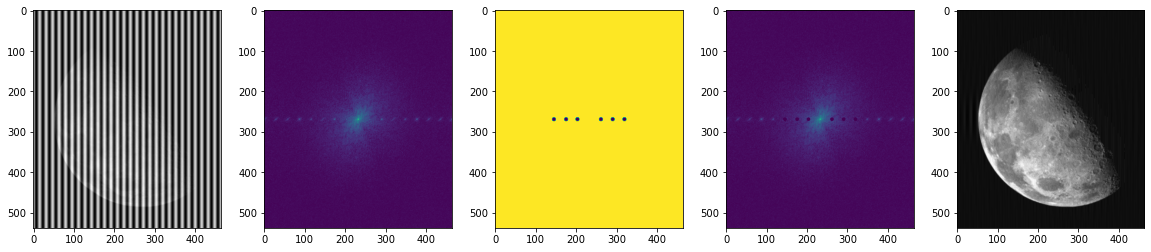

Saving image to: image_processed\moon_filtered.png


In [2]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

### START YOUR CODE HERE ### (You can change anything inside this block)

    fft_im = np.fft.fft2(im)
    # The filter consists of some circles that eliminate (most of) the wrong frequencies
    # The coordinates were got via experimentation and analyzing of the DFT of the original image
    fft_kernel = np.ones(im.shape)
    rr, cc = skimage.draw.ellipse(269, 145, 5, 5)
    fft_kernel[rr, cc] = 0
    rr, cc = skimage.draw.ellipse(269, 175, 5, 5)
    fft_kernel[rr, cc] = 0
    rr, cc = skimage.draw.ellipse(269, 203, 5, 5)
    fft_kernel[rr, cc] = 0
    rr, cc = skimage.draw.ellipse(269, 261, 5, 5)
    fft_kernel[rr, cc] = 0
    rr, cc = skimage.draw.ellipse(269, 290, 5, 5)
    fft_kernel[rr, cc] = 0
    rr, cc = skimage.draw.ellipse(269, 319, 5, 5)
    fft_kernel[rr, cc] = 0
    # Apply the frequency shift to the filter
    fft_kernel = np.fft.fftshift(fft_kernel)

    # Convolve!
    fft_conv = fft_im * fft_kernel
    
    # Get the corrected moon picture with an inverse DFT
    im_filtered = np.fft.ifft2(fft_conv).real

    # Visualization like in previous tasks
    # Use plt.subplot to place two or more images beside eachother
    visualize_im_fft = np.log(np.absolute(np.fft.fftshift(fft_im)) + 1)
    visualze_kernel_fft = np.log(np.absolute(np.fft.fftshift(fft_kernel)) + 1)
    visualize_conv_fft = np.log(np.absolute(np.fft.fftshift(fft_conv)) + 1)
    
    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 5, 2) 
    plt.imshow(visualize_im_fft)
    # Visualize FFT
    plt.subplot(1, 5, 3)
    plt.imshow(visualze_kernel_fft)
    # Visualize FFT kernel
    plt.subplot(1, 5, 4)
    plt.imshow(visualize_conv_fft)
    # Visualize filtered FFT image
    plt.subplot(1, 5, 5) 
    # Visualize filtered spatial image
    plt.imshow(im_filtered, cmap="gray")

    plt.show()
    ### END YOUR CODE HERE ###

    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))
